In [1]:
import mplstereonet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

ModuleNotFoundError: No module named 'mplstereonet'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [2]:
df_all = pd.read_csv('./run_1_clusters.csv')
hf_cond = df_all['name'].str.contains('HF')
out_cond = df_all['name'].str.contains('OUT')

Generate a steronet using mplstereonet

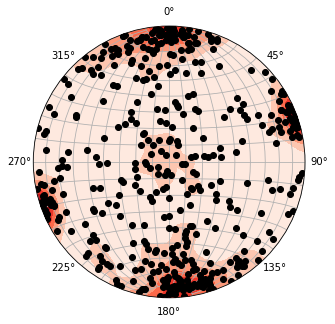

In [14]:
df = df_all
strikes = df.plane_strike * 180 / math.pi
dips = df.plane_dip * 180 / math.pi
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='stereonet')
ax.pole(strikes, dips, c='k')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds', sigma = 3)
ax.grid()
plt.savefig("Stereo_hf.eps")

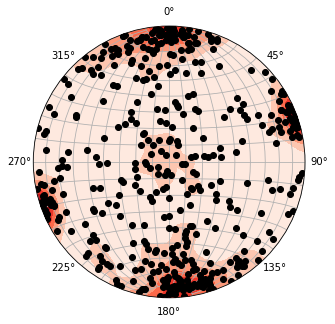

In [18]:
df = df_all
strikes = df.plane_strike * 180 / math.pi
dips = df.plane_dip * 180 / math.pi
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='stereonet')
ax.pole(strikes, dips, c='k')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds', sigma = 3)
ax.grid()
plt.savefig("Stereo_is.eps")

Generate a rose diagram of the plane strikes

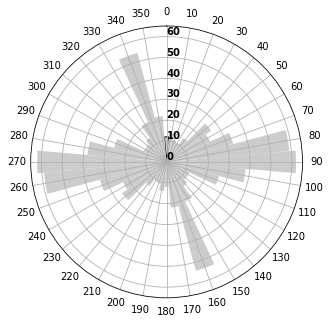

In [19]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
number_of_strikes[0] += number_of_strikes[-1]
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='polar')
ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(0.0001, two_halves.max(), 10), angle=0, weight= 'black')
plt.savefig("Rose_hf.eps")

Generate a histogram and ecdf of the maximum plane length (in m)

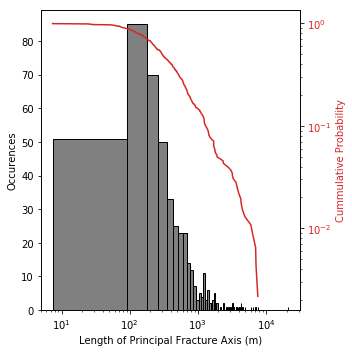

In [9]:
ecdf = ECDF(df['plane_l1'])

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

ax1.hist(df['plane_l1'], color = 'grey', edgecolor = 'black',
         bins = 250)
ax1.set_xlabel('Length of Principal Fracture Axis (m)')
ax1.set_ylabel('Occurences')

col = 'tab:red'
ax2 = ax1.twinx()
ax2.loglog(ecdf.x, 1-ecdf.y, color = col)
ax2.set_ylabel('Cummulative Probability', color = col)
ax2.tick_params(axis='y', labelcolor= col)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("FracLength.eps")
plt.show()

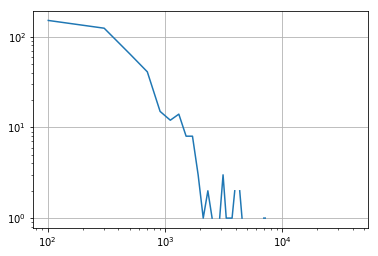

In [10]:
bins = np.linspace(0,40000,199)
data = df['plane_l1']
hist = np.histogram(data, bins)
bin_cent = (hist[1][1:] + hist[1][0:-1]) / 2
plt.loglog(bin_cent, hist[0])
plt.grid()

11.5855847541
1.39151763818


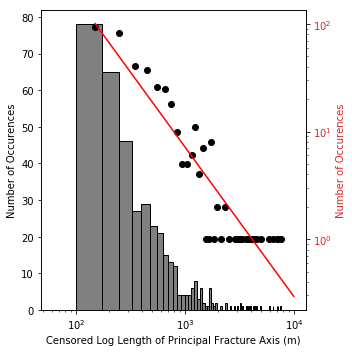

In [11]:
cen_data = df['plane_l1'][(df['plane_l1'] >= 100) & (df['plane_l1'] <= 10000)]
bins = np.linspace(100,10000,100)
hist = np.histogram(cen_data, bins)
bin_cent = (hist[1][1:] + hist[1][0:-1]) / 2

nz_L = bin_cent[hist[0] != 0]
nz_N = hist[0][hist[0] != 0]

def f(x, A, Df):
    return Df * x + A

hist[0] != 0

popt, pcov = scipy.optimize.curve_fit(f, np.log(1./nz_L), np.log(nz_N))
A, Df = popt
print(A)
print(Df)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

ax1.hist(cen_data, color = 'grey', edgecolor = 'black',
         bins = 100)
ax1.set_xlabel('Censored Log Length of Principal Fracture Axis (m)')
ax1.set_ylabel('Number of Occurences')

col = 'tab:red'
ax2 = ax1.twinx()
ax2.scatter(nz_L, nz_N, color = 'black')
ax2.loglog(bin_cent, np.exp(A) * 1./(bin_cent) ** Df, color = 'red')
ax2.set_ylabel('Number of Occurences', color = col)
ax2.tick_params(axis='y', labelcolor= col)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Fractal.eps")
plt.show()

(array([ 329.,   42.,   13.,    5.,    5.,    5.,    1.,    1.,    1.,    3.]),
 array([  100.31695123,   848.2311442 ,  1596.14533716,  2344.05953013,
         3091.9737231 ,  3839.88791607,  4587.80210904,  5335.716302  ,
         6083.63049497,  6831.54468794,  7579.45888091]),
 <a list of 10 Patch objects>)

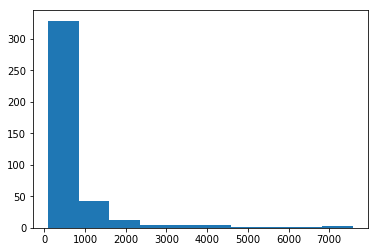

In [12]:
plt.hist(cen_data)

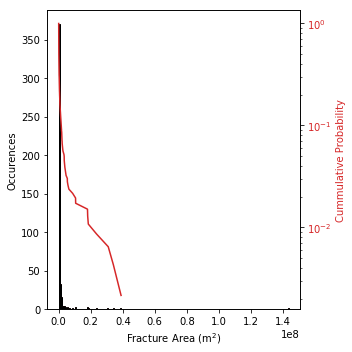

In [13]:
frac_area = np.pi * df['plane_l1'] * df['plane_l2']
ecdf = ECDF(frac_area)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

ax1.hist(frac_area, color = 'red', edgecolor = 'black',
         bins = 250)
ax1.set_xlabel('Fracture Area (m$^2$)')
ax1.set_ylabel('Occurences')

col = 'tab:red'
ax2 = ax1.twinx()
ax2.semilogy(ecdf.x, 1-ecdf.y, color = col)
ax2.set_ylabel('Cummulative Probability', color = col)
ax2.tick_params(axis='y', labelcolor= col)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("FracArea.eps")
plt.show()